# 🚀 Amazon Sales Data Analysis Project

## Introduction
This study is designed to examine large-scale Amazon sales data, which forms the foundation of the rapidly growing e-commerce world. The project aims not only to present data analysis results but also to deeply explore the technological infrastructure of modern data science approaches. In this context, starting with the fundamental principles of Big Data (Volume, Velocity, Variety), the industry standard framework for distributed and high-performance data processing, Apache Spark (PySpark), will be utilized. Throughout the work, the differences between Spark's core building blocks, RDDs and DataFrames, will be investigated, and data loading processes will be addressed within the context of Distributed Storage solutions such as HDFS and S3. Finally, data will be processed using PySpark's powerful filtering, aggregation, and joining capabilities, the findings will be presented through visualization tasks, and the work will be concluded with a mini analysis report. Our goal is to leverage the power of PySpark to uncover critical business trends and operational insights within the Amazon sales data: [Amazon Sale Report.csv](https://3678736131-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FXhceq1glyy51JLqIb03M%2Fuploads%2FlAOjNY6ycOels0MWL1j9%2FAmazon%20Sale%20Report.csv?alt=media&token=0f0068b1-8454-4a6c-9feb-de172edf2682)

## Project Details

* **Framework:** Apache PySpark
* **Environment:** Google Colab / Jupyter Notebook
* **Visualization:** Matplotlib & Seaborn
* **Output:** Single .ipynb file + Short Summary Report

## Setup and Environment Configuration

In [1]:
## COMPLETE PYSPARK SETUP: VERIFIED METHOD FOR COLAB

print("1. Installing OpenJDK...")
# 1. Install OpenJDK (Java is required for Spark)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

print("2. Downloading Apache Spark...")
# 2. Download Apache Spark 3.5.1 (Direct link using a common mirror)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz -O spark.tgz

# 3. Extract the Spark file
print("3. Extracting Spark files...")
!tar xf spark.tgz

# 4. Clean up the archive file
!rm spark.tgz

# 5. Install findspark library
print("4. Installing findspark...")
!pip install -q findspark

# 6. Set Environment Variables
print("5. Setting environment variables...")
import os
import findspark
from pyspark.sql import SparkSession

# Set SPARK_HOME to the extracted folder (Note: folder name is long, be careful)
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# Set JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Initialize findspark
findspark.init()

# 7. Create a Spark Session
print("6. Initializing Spark Session...")
spark = SparkSession.builder\
        .master("local[*]")\
        .appName("AmazonAnalysis")\
        .getOrCreate()

# VERIFICATION
print("\n--- Spark Setup Complete ---")
print("Spark Session successfully created:")
spark

1. Installing OpenJDK...
2. Downloading Apache Spark...
3. Extracting Spark files...
4. Installing findspark...
5. Setting environment variables...
6. Initializing Spark Session...

--- Spark Setup Complete ---
Spark Session successfully created:


## 🏔️ Section 1 — What is Big Data? (Volume, Velocity, Variety)

In [2]:
## DATA UPLOAD

# Upload the Amazon sales data file from your local machine to the Colab environment.
# A file selector will appear after executing this cell.
from google.colab import files
uploaded = files.upload()

Saving Amazon Sale Report.csv to Amazon Sale Report.csv


In [3]:
FILE_PATH = "Amazon Sale Report.csv"

try:
    amazon_df = spark.read.csv(
        FILE_PATH,
        header=True,
        inferSchema=True
    )

except Exception as e:
    print(f"An error occurred during file loading: {e}")
    print("Please ensure the FILE_PATH variable matches the uploaded file name exactly.")

In [4]:
    # Check the data structure and schema
    print("--- DataFrame Schema (Structure) ---")
    amazon_df.printSchema()

    # Check the first few records
    print("\n--- First 5 Rows of Data ---")
    amazon_df.show(5)

    # Check the total number of records
    print(f"\nTotal Records: {amazon_df.count()}")

--- DataFrame Schema (Structure) ---
root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolea

In [5]:
## 1. ANALYSIS OF DIMENSIONS (RELATION TO VOLUME)
# Calculate the total number of rows (Volume proxy) and columns.
row_count = amazon_df.count()
col_count = len(amazon_df.columns)

# Display the results.
print(f"DataFrame Dimensions (Rows, Columns): ({row_count}, {col_count})")

# --- COMMENTARY ON VOLUME ---
# The large number of rows ({row_count}) directly correlates to the **Volume** characteristic of Big Data.
# A high record count demonstrates the sheer scale of transactions accumulated over the observation period,
# necessitating the use of a distributed computing framework like PySpark for efficient handling.

DataFrame Dimensions (Rows, Columns): (128975, 24)


In [6]:
from collections import Counter

## VARIETY ANALYSIS: LIST ALL TYPES AND SUMMARIZE FREQUENCIES

# Get the schema as a list of field objects (StructField objects)
data_schema = amazon_df.schema
data_type_list = [str(field.dataType) for field in data_schema]

# 1. LIST ALL COLUMNS AND THEIR TYPES (Aligned Output)
print("--- 1. Detailed Column-to-Type Mapping (Variety) ---")

# Find the length of the longest column name for dynamic alignment
max_name_length = max(len(field.name) for field in data_schema)

# Iterate and print each column with aligned formatting
for field in data_schema:
    # {field.name:<{max_name_length}} ensures left alignment based on the longest name
    print(f"Column: {field.name:<{max_name_length}} | Data Type: {field.dataType}")


# 2. DATA TYPE FREQUENCY SUMMARY (Table Output)
print("\n--- 2. Data Type Frequency Summary (Variety Count) ---")

# Use Counter to count the occurrences of each unique data type
type_counts = Counter(data_type_list)

# Determine max lengths for alignment in the summary table
max_type_len = max(len(type_name) for type_name in type_counts.keys())
header_format = f"| {'Data Type':<{max_type_len}} | {'Count':<5} |"
separator = "-" * (max_type_len + 12)

# Print Summary Table
print(separator)
print(header_format)
print(separator)

# Print Data
for data_type, count in type_counts.items():
    print(f"| {data_type:<{max_type_len}} | {count:<5} |")
print(separator)

--- 1. Detailed Column-to-Type Mapping (Variety) ---
Column: index              | Data Type: IntegerType()
Column: Order ID           | Data Type: StringType()
Column: Date               | Data Type: StringType()
Column: Status             | Data Type: StringType()
Column: Fulfilment         | Data Type: StringType()
Column: Sales Channel      | Data Type: StringType()
Column: ship-service-level | Data Type: StringType()
Column: Style              | Data Type: StringType()
Column: SKU                | Data Type: StringType()
Column: Category           | Data Type: StringType()
Column: Size               | Data Type: StringType()
Column: ASIN               | Data Type: StringType()
Column: Courier Status     | Data Type: StringType()
Column: Qty                | Data Type: IntegerType()
Column: currency           | Data Type: StringType()
Column: Amount             | Data Type: DoubleType()
Column: ship-city          | Data Type: StringType()
Column: ship-state         | Data Type: Stri

In [7]:
from pyspark.sql.functions import min as spark_min, max as spark_max, datediff, to_date, lit, round as spark_round

## 3. ANALYZE DATE RANGE AND TRANSACTION RATE (RELATION TO VELOCITY)

# --- Prerequisites: Assuming 'amazon_df' is loaded and 'Date' column is present ---
row_count = amazon_df.count()

# Convert the 'Date' column to a proper Date type (MM-dd-yy format assumed from previous context)
df_with_date = amazon_df.withColumn("Order_Date", to_date(amazon_df["Date"], "MM-dd-yy"))

# Find the earliest and latest order dates
date_analysis = df_with_date.agg(
    spark_min("Order_Date").alias("Min_Date"),
    spark_max("Order_Date").alias("Max_Date")
).collect()[0]

min_date = date_analysis['Min_Date']
max_date = date_analysis['Max_Date']

# Calculate the number of days between the first and last transaction
days_span = df_with_date.withColumn(
    "Date_Span",
    datediff(lit(max_date), lit(min_date))
).select(spark_max("Date_Span")).collect()[0][0]

# --- NEW CALCULATION: AVERAGE TRANSACTION RATE ---

# Calculate the average number of transactions per day
if days_span > 0:
    avg_tx_per_day = round(row_count / days_span)
else:
    avg_tx_per_day = row_count # Handle case where all transactions are on the same day

print(f"Earliest Order Date: {min_date}")
print(f"Latest Order Date: {max_date}")
print(f"Total Span of Data (Days): {days_span}")
print(f"Total Transactions: {row_count:,}")

# Print the new metric, rounded to 2 decimal places
print(f"Average Transactions per Day: {avg_tx_per_day:,.0f}")

Earliest Order Date: 2022-03-31
Latest Order Date: 2022-06-29
Total Span of Data (Days): 90
Total Transactions: 128,975
Average Transactions per Day: 1,433


### The 3 V's Justify PySpark

The analysis of the Amazon sales data confirms its classification as **Big Data** due to the presence of the defining **3 V's**, which collectively necessitate the use of a distributed framework like Apache Spark.

* **Volume:** The sheer scale of **128,975** transactions accumulated within a short observation period highlights the significant data **Volume**. This mass of records cannot be efficiently processed or analyzed using single-machine traditional tools.

* **Velocity:** The data generation rate, evidenced by the high **Velocity** of approximately **1,433 transactions per day** over a **90-day** span, shows a continuous, fast-flowing data stream. Analyzing trends from such rapidly generated data demands the high-throughput capabilities that PySpark provides.

* **Variety:** The dataset demonstrates **Variety** through its blend of data types, including **Strings** (for categorical features like 'Category' and 'City') and **Numeric** types (for 'Qty' and 'Amount'). While currently structured, this inherent diversity, along with the potential future inclusion of unstructured data, reinforces the need for PySpark’s flexible DataFrame API.

In conclusion, the challenge presented by the data's **Volume, Velocity, and Variety** confirms that **PySpark is the appropriate technology** to manage, transform, and extract meaningful business insights from this large-scale e-commerce data.

## 🐘 Section 2 — Hadoop & MapReduce

> **HDFS (Hadoop Distributed File System):** This is the foundation for Big Data storage. HDFS breaks large files (like our sales data) into small blocks, stores them across many machines, and creates multiple copies (replication) to ensure the data is always safe and accessible, regardless of hardware failures.

> **MapReduce:** This is a programming model for distributed computation on data stored in HDFS. It simplifies complex tasks by dividing them into two main, parallel stages: **Map** (data transformation and grouping) and **Reduce** (data aggregation and calculation).

In [8]:
from pyspark.sql.functions import col, sum, round

## SIMULATION OF MAPREDUCE: CALCULATING TOTAL SALES BY CATEGORY

# Assume the DataFrame is amazon_df and columns 'Category' and 'Amount' exist.

# --- 1. MAP OPERATION (Transformation/Grouping) ---
# The Map step is simulated by selecting the relevant columns and defining the grouping key.
# We are preparing the data to be grouped by 'Category'.

# Check if the required columns exist before proceeding
required_cols = ['Category', 'Amount']
if not all(c in amazon_df.columns for c in required_cols):
    print("Error: DataFrame must contain 'Category' and 'Amount' columns for this analysis.")
else:
    # Select and group the data
    category_group = amazon_df.groupBy(col("Category"))

    # --- 2. REDUCE OPERATION (Aggregation) ---
    # The Reduce step is simulated by applying an aggregation function (sum) on the 'Amount' column
    # within each group defined in the Map phase.
    total_sales_by_category = category_group.agg(
        sum(col("Amount")).alias("Total_Sales_Amount")
    ).orderBy(col("Total_Sales_Amount").desc()) # Ordering is a final transformation

    # --- Show Results (Final Action) ---
    print("--- Total Sales Amount by Category (MapReduce Simulation) ---")
    total_sales_by_category.show(truncate=False)

--- Total Sales Amount by Category (MapReduce Simulation) ---
+-------------+--------------------+
|Category     |Total_Sales_Amount  |
+-------------+--------------------+
|Set          |3.920412402999991E7 |
|kurta        |2.1299546699999988E7|
|Western Dress|1.121607269000002E7 |
|Top          |5347792.3           |
|Ethnic Dress |791217.6599999999   |
|Blouse       |458408.18           |
|Bottom       |150667.97999999998  |
|Saree        |123933.76           |
|Dupatta      |915.0               |
+-------------+--------------------+



### Interpretation: Data Transformation

The PySpark aggregation used to find total sales per category effectively simulates the core MapReduce logic:

* **Map Operation (Grouping):** This step was achieved by **`.groupBy(col("Category"))`**. Conceptually, it mapped every sales transaction and prepared it for grouping, where the `Category` acted as the unique **Key**.

* **Reduce Operation (Aggregation):** This step was achieved by **`.agg(sum(col("Amount")))`**. The Reduce phase took all `Amount` values associated with a single `Category` (Key) and aggregated them using the **`sum`** function, resulting in the final total sales figure for that category.

This process demonstrates how complex calculations are broken down into parallel tasks, leveraging Spark's distributed processing power.

##⚡ Section 3 — Apache Spark (PySpark): RDD vs DataFrame

In [9]:
from pyspark.sql.functions import sum as spark_sum, col
from datetime import datetime

print("--- RDD vs DataFrame Performance Comparison ---")

# ----------------------------------------------------
# 1. DATAFRAME APPROACH (Optimized)
# ----------------------------------------------------

df_start = datetime.now()
df_sales_category = amazon_df.groupBy("Category").agg(
    spark_sum(col("Amount")).alias("Total_Sales_Amount")
).orderBy(col("Total_Sales_Amount").desc())

df_sales_category.show(5, truncate=False)
df_end = datetime.now()
df_time = (df_end - df_start).total_seconds()
print(f"DataFrame Execution Time: {df_time:.4f} seconds")


# ----------------------------------------------------
# 2. RDD APPROACH (Manual MapReduce)
# ----------------------------------------------------

rdd_start = datetime.now()

# Map: Select Category and Amount columns, filter nulls, and create (Category, Amount) tuples
rdd_data = amazon_df.select("Category", "Amount").rdd.filter(lambda x: x['Amount'] is not None)

# Map: Create (Category, Amount) pairs
rdd_mapped = rdd_data.map(lambda row: (row['Category'], row['Amount']))

# Reduce: Sum values for the same key
rdd_reduced = rdd_mapped.reduceByKey(lambda a, b: a + b)

# Final step: Convert to DataFrame for display and sorting
rdd_sales_category = rdd_reduced.toDF(["Category", "Total_Sales_Amount"]).orderBy(col("Total_Sales_Amount").desc())

rdd_sales_category.show(5, truncate=False)
rdd_end = datetime.now()
rdd_time = (rdd_end - rdd_start).total_seconds()
print(f"RDD Execution Time: {rdd_time:.4f} seconds")


# ----------------------------------------------------
# 3. MEMORY OPTIMIZATION (CACHING)
# ----------------------------------------------------

# Caching the original DataFrame
amazon_df.cache()

# Trigger an action to force the data to be loaded into memory
print("\n--- Caching Data (Triggering Action) ---")
initial_count = amazon_df.count()
print(f"Dataframe loaded into memory. Total rows: {initial_count:,}")

# Run a simple operation again to measure speed improvement after caching
cache_start = datetime.now()
amazon_df.groupBy("Category").count().show(5, truncate=False)
cache_end = datetime.now()
cache_time = (cache_end - cache_start).total_seconds()
print(f"Execution Time AFTER Caching: {cache_time:.4f} seconds")

--- RDD vs DataFrame Performance Comparison ---
+-------------+--------------------+
|Category     |Total_Sales_Amount  |
+-------------+--------------------+
|Set          |3.920412402999991E7 |
|kurta        |2.1299546699999988E7|
|Western Dress|1.121607269000002E7 |
|Top          |5347792.3           |
|Ethnic Dress |791217.6599999999   |
+-------------+--------------------+
only showing top 5 rows

DataFrame Execution Time: 1.1793 seconds
+-------------+--------------------+
|Category     |Total_Sales_Amount  |
+-------------+--------------------+
|Set          |3.920412402999991E7 |
|kurta        |2.1299546699999988E7|
|Western Dress|1.121607269000002E7 |
|Top          |5347792.3           |
|Ethnic Dress |791217.6599999999   |
+-------------+--------------------+
only showing top 5 rows

RDD Execution Time: 5.5645 seconds

--- Caching Data (Triggering Action) ---
Dataframe loaded into memory. Total rows: 128,975
+------------+-----+
|Category    |count|
+------------+-----+
|Ethn

### RDD vs. DataFrame Performance Analysis

The execution times and code structure conclusively demonstrate the superiority of the DataFrame API for structured data processing in PySpark:

| Approach | Execution Time (seconds) | Performance Factor |
| :--- | :--- | :--- |
| **DataFrame (Initial Run)** | **1.1793** | **1x (Base performance)** |
| **RDD (Manual MapReduce)** | **5.5645** | **~4.72x Slower** than DataFrame |
| **DataFrame (After Caching)** | **0.7044** | **~1.67x Faster** than Initial DataFrame |
<br>

#### Performance and Optimization:

1. ***DataFrame Superiority:*** The DataFrame approach executed the same aggregation task (Total Sales by Category) in $1.1793$ seconds, while the RDD approach required $5.5645$ seconds. This substantial difference (RDD being approximately $4.72$ times slower) highlights the efficiency of the Catalyst Optimizer and Tungsten Execution Engine, which utilize the schema to generate optimized, highly efficient execution plans.

2. ***Caching Effectiveness:*** Applying the .cache() operation drastically reduced the subsequent execution time from $1.1793$ seconds to $0.7044$ seconds. This confirms that for repetitive operations, loading the 128,975 records into the cluster's RAM eliminates expensive I/O operations, yielding a significant speed boost (approximately 67% faster than the uncached run).
<br>

### Code Readability:

The DataFrame code used concise, declarative, SQL-like commands (.groupBy().agg(sum())), making the logic highly readable and easier to maintain. In contrast, the RDD approach required verbose, low-level Python coding for manual map and reduceByKey operations, significantly reducing code clarity and increasing development time.
<br>

###Conclusion:
The results validate the industry standard: the DataFrame API provides optimal performance and superior readability for structured Big Data analysis due to internal optimization engines and high-level abstraction.


## 🧪 Section 4 — Spark SQL & Streaming

###💡 Spark SQL Tasks:

In [10]:
from pyspark.sql.functions import round

# 1. Convert DataFrame to a temporary SQL view
VIEW_NAME = "sales_data"
amazon_df.createOrReplaceTempView(VIEW_NAME)

print(f"DataFrame successfully converted to a temporary SQL view: {VIEW_NAME}")

DataFrame successfully converted to a temporary SQL view: sales_data


In [11]:
# SQL Query (Total sales amount for each category)
category_sales_sql = spark.sql(f"""
    SELECT
        Category,
        ROUND(SUM(Amount), 2) AS Total_Sales_Amount
    FROM
        {VIEW_NAME}
    GROUP BY
        Category
    ORDER BY
        Total_Sales_Amount DESC
""")

# Show Output Table
print("\n--- 1. Total Sales Amount by Category (SQL) ---")
category_sales_sql.show(10, truncate=False)


--- 1. Total Sales Amount by Category (SQL) ---
+-------------+------------------+
|Category     |Total_Sales_Amount|
+-------------+------------------+
|Set          |3.920412403E7     |
|kurta        |2.12995467E7      |
|Western Dress|1.121607269E7     |
|Top          |5347792.3         |
|Ethnic Dress |791217.66         |
|Blouse       |458408.18         |
|Bottom       |150667.98         |
|Saree        |123933.76         |
|Dupatta      |915.0             |
+-------------+------------------+



In [39]:
# SQL Query (The state with the highest sales)
highest_sales_state_sql = spark.sql(f"""
    SELECT
        `ship-state` AS Shipping_State,
        ROUND(SUM(Amount), 2) AS Total_Sales
    FROM
        {VIEW_NAME}
    GROUP BY
        `ship-state`
    ORDER BY
        Total_Sales DESC
    LIMIT 1
""")

# Show Output Table
print("\n--- 2. The state with the highest sales (SQL) ---")
highest_sales_state_sql.show(5, truncate=False)


--- 2. The state with the highest sales (SQL) ---
+--------------+-------------+
|Shipping_State|Total_Sales  |
+--------------+-------------+
|MAHARASHTRA   |1.333553414E7|
+--------------+-------------+



In [13]:
# SQL Query
cancellation_ratio_sql = spark.sql(f"""
    SELECT
        COUNT(CASE WHEN Status = 'Cancelled' THEN 1 END) AS Cancelled_Count,
        COUNT(*) AS Total_Orders,
        ROUND(
            (COUNT(CASE WHEN Status = 'Cancelled' THEN 1 END) * 100.0) / COUNT(*),
            2
        ) AS Cancellation_Ratio_Percent
    FROM
        {VIEW_NAME}
""")

# Show Output Table
print("\n--- 3. Cancellation Ratio (SQL) ---")
cancellation_ratio_sql.show(truncate=False)


--- 3. Cancellation Ratio (SQL) ---
+---------------+------------+--------------------------+
|Cancelled_Count|Total_Orders|Cancellation_Ratio_Percent|
+---------------+------------+--------------------------+
|18332          |128975      |14.21                     |
+---------------+------------+--------------------------+



### Summary of Spark SQL Insights

The use of **Spark SQL** provided a rapid, declarative interface for large-scale data analysis, successfully transforming the distributed dataset into critical business intelligence.

1.  ### 💰 Sales and Profitability (Category Analysis)
    * **Analysis:** The `Total Sales Amount by Category` analysis clearly identifies **'Set'** as the overwhelmingly dominant revenue generator ($39.2$ million), followed by **'kurta'** ($21.2$ million). Lower-ranking categories contribute minimally.
    * **Insight:** These top profitable categories must be strongly prioritized for **inventory stocking and targeted marketing** to maximize business profitability and maintain focus on core products.

2.  ### 🌎 Geographical Focus (State Analysis)
    * **Analysis:** The analysis of sales by state pinpoints **MAHARASHTRA** as the single highest revenue contributor, generating over **$13.3$ million** in total sales.
    * **Insight:** This state is the primary market driver. This data is crucial for **optimizing logistics**, prioritizing distribution capacity, and effectively allocating regional marketing resources toward this key region.

3.  ### 🚨 Operational Efficiency (Cancellation Ratio)
    * **Analysis:** The calculated **Cancellation Ratio is $14.21\%$** (18,332 cancelled orders out of 128,975 total orders).
    * **Insight:** **This ratio is significantly high.** Far from indicating efficiency, this metric points to a **critical and unsustainable loss of revenue** due to major operational flaws in inventory management (e.g., out-of-stock items), shipping, or quality control. Continuous monitoring and immediate corrective action are mandatory.

**Conclusion:** Spark SQL efficiently transforms massive data into actionable insights for strategic decision-making. However, the insights derived must immediately trigger operational reviews, particularly regarding the high cancellation rate.

###⚡ Streaming Tasks:

In [14]:
## STEP 1: CREATE DIRECTORIES FOR STREAMING SIMULATION

import os

# Define directory paths
INPUT_PATH = "/content/streaming_input/"
CHECKPOINT_PATH = "/content/streaming_checkpoint/"
OUTPUT_PATH = "/content/streaming_output/"

# Create directories if they don't exist
os.makedirs(INPUT_PATH, exist_ok=True)
os.makedirs(CHECKPOINT_PATH, exist_ok=True)
os.makedirs(OUTPUT_PATH, exist_ok=True)

print(f"Input directory created at: {INPUT_PATH}")

Input directory created at: /content/streaming_input/


In [15]:
# List the contents of the main content directory
print("--- Content Directory Contents ---")
!ls /content

# List the contents of the Streaming Input directory
print("\n--- Streaming Input Folder Contents ---")
!ls -R /content/streaming_input

--- Content Directory Contents ---
'Amazon Sale Report.csv'   spark-3.5.1-bin-hadoop3   streaming_input
 sample_data		   streaming_checkpoint      streaming_output

--- Streaming Input Folder Contents ---
/content/streaming_input:


In [16]:
## STEP 2: CREATE INITIAL DATA FILE FOR STREAMING SOURCE

# Save a small subset of the original DataFrame as the initial streaming file
initial_data = amazon_df.limit(100)
initial_data.write.csv(INPUT_PATH + "initial_batch.csv", header=True, mode="overwrite")

print("Initial streaming data batch created.")

Initial streaming data batch created.


In [17]:
from pyspark.sql.functions import sum as spark_sum, col, round

## STEP 3: START SPARK STRUCTURED STREAMING QUERY

# Define the schema of the streaming data (must match the source data structure)
# We use the schema from the existing DataFrame for reliability.
input_schema = amazon_df.schema

# 1. READ STREAM: Define the streaming source (the folder)
sales_stream_df = spark.readStream \
    .schema(input_schema) \
    .csv(INPUT_PATH)

# 2. TRANSFORMATION (MapReduce Logic): Calculate total sales by category
# This will be recalculated every time a new file arrives.
category_sales_stream = sales_stream_df \
    .withColumn("Amount", col("Amount").cast("double")) \
    .groupBy("Category") \
    .agg(
        round(spark_sum(col("Amount")), 2).alias("Total_Sales_Amount")
    ) \
    .orderBy(col("Total_Sales_Amount").desc())


# 3. WRITE STREAM: Define the output sink
# The 'complete' output mode ensures the entire aggregated result is written on every trigger.
# Note: For Colab, we write to the console (memory) or an external path (file/database).
# Here, we will write to the console for real-time viewing.

query = category_sales_stream.writeStream \
    .outputMode("complete") \
    .format("console") \
    .option("checkpointLocation", CHECKPOINT_PATH) \
    .option("truncate", "false") \
    .start()

print("\n--- Spark Streaming Query Started (Monitoring Input Folder) ---")
print("New results will appear in the console when a new file is added to the folder.")

# The query runs asynchronously. Wait a few seconds for the initial batch to process.
import time
time.sleep(10) # Wait 10 seconds for initial processing


--- Spark Streaming Query Started (Monitoring Input Folder) ---
New results will appear in the console when a new file is added to the folder.


In [18]:
## STEP 4: ADD A NEW FILE TO SIMULATE REAL-TIME DATA (TRIGGERING RECALCULATION)

print("\n--- Simulating New Data Arrival (Triggering Stream) ---")

# Create a small, new batch of data
new_batch_df = amazon_df.limit(50).withColumn("New_Order", col("Amount") * 1.5)

# Save this new data to a new file in the input folder
new_batch_df.write.csv(INPUT_PATH + "second_batch.csv", header=True, mode="overwrite")

print("Second data batch added to the input folder.")

# Wait for the stream to process the new file (Wait 10-15 seconds)
time.sleep(15)

# Stop the streaming query after simulation
query.stop()
print("\n--- Streaming Query Stopped ---")


--- Simulating New Data Arrival (Triggering Stream) ---
Second data batch added to the input folder.

--- Streaming Query Stopped ---


### Concept Interpretation: Real-Time Data and Velocity

The Streaming task clearly demonstrates the concept of **Real-Time Data** in the context of high **Velocity**:

1.  **Real-Time Data Simulation:** The process simulated a system where continuous data (new sales transactions) arrived as new files. Spark Streaming's ability to constantly monitor the input folder and immediately process the **second batch** without restarting the entire system proves its real-time capability.

2.  **Velocity Application:** This is a direct, practical example of the **Velocity** characteristic of Big Data. In an actual e-commerce environment, every customer purchase is a new data point that must be analyzed immediately. Spark Streaming allows the business to calculate metrics like *Total Sales by Category* on the fly, providing near-instantaneous business intelligence crucial for timely operational adjustments (e.g., inventory alerts, fraud detection).

**Conclusion:** Unlike batch processing (Sections 2 & 3) where analysis runs on static data, **Spark Streaming enables continuous analytics** on data in motion, making it an essential tool for handling high-velocity data streams.

## 💾 Section 5 — Distributed Storage (HDFS & S3)

In [19]:
## STEP 1: SAVE DATA IN PARQUET FORMAT

# Define a path in the local Colab filesystem to simulate distributed storage
PARQUET_PATH = "/content/amazon_sales_parquet/"

# Save the DataFrame in Parquet format
amazon_df.write.mode("overwrite").parquet(PARQUET_PATH)

print(f"Data successfully saved to Parquet format at: {PARQUET_PATH}")

Data successfully saved to Parquet format at: /content/amazon_sales_parquet/


In [20]:
## STEP 2: READ PARQUET DATA AND VERIFY ROW COUNT

# Read the Parquet file back into a new DataFrame
parquet_df = spark.read.parquet(PARQUET_PATH)

# Check the row count to verify data integrity
parquet_row_count = parquet_df.count()

# Check the schema to see if data types were preserved
print("\n--- Parquet DataFrame Schema ---")
parquet_df.printSchema()

print(f"\nOriginal Row Count: {amazon_df.count():,}")
print(f"Parquet Read Row Count: {parquet_row_count:,}")

if amazon_df.count() == parquet_row_count:
    print("Verification Successful: All rows were preserved during Parquet save/read.")


--- Parquet DataFrame Schema ---
root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolean (

### Advantages of the Parquet Format

The Parquet format is the industry standard for analytical workloads in Spark due to its technical superiority:

1.  **Columnar Storage:** Instead of storing data row-by-row, Parquet stores data column-by-column. This means when a query only needs a few columns (e.g., `Category` and `Amount`), Spark only reads those specific columns, leading to significant **I/O reduction** and **faster query execution**.
2.  **Efficient Compression:** Storing data by column allows for better compression algorithms, as data within a single column is generally of the same type and has similar patterns. This results in smaller file sizes, saving storage costs.
3.  **Schema Evolution:** Parquet supports adding new columns or changing existing ones without affecting the ability to read old data, crucial for long-term data warehousing.
4.  **Optimized Encoding:** It is highly integrated with Spark (and its underlying technologies like the Catalyst Optimizer) and supports data partitioning and efficient encoding techniques.

In [21]:
## OPTIONAL STEP: JSON COMPARISON AND S3 SIMULATION

# 1. Simulate saving in the less efficient JSON format
JSON_PATH = "/content/amazon_sales_json/"
amazon_df.write.mode("overwrite").json(JSON_PATH)

print(f"\nData saved in JSON format at: {JSON_PATH}")

# 2. Simulate writing to S3 (Cannot connect to AWS, so we simulate the path)
# The file system driver (s3a) is necessary in a real Spark environment.
print("\n--- S3 Simulation ---")
print("In a real environment, the command would look like this (but cannot be executed in Colab):")

# This is a hypothetical command for demonstration:
S3_SIMULATION_CODE = f"""
amazon_df.write.mode("overwrite").parquet("s3a://fake-bucket/amazon_sales/")
"""
print(S3_SIMULATION_CODE)


Data saved in JSON format at: /content/amazon_sales_json/

--- S3 Simulation ---
In a real environment, the command would look like this (but cannot be executed in Colab):

amazon_df.write.mode("overwrite").parquet("s3a://fake-bucket/amazon_sales/")



### JSON vs. Parquet Observation

JSON is a human-readable, row-based format commonly used for data exchange, but it is **inefficient for analytics**.

* **Parquet:** Optimized for reading partial data (columnar) and highly compressed. **Best for analysis.**
* **JSON:** Reads the entire row even if only one column is needed, leading to slower query times and higher storage requirements. **Best for data transfer and human readability.**

### Why Distributed Storage Systems Are Critical

Distributed storage systems like **HDFS (Hadoop Distributed File System)** and **S3 (Amazon Simple Storage Service)** are fundamental to Big Data infrastructure and the success of a PySpark project:

1.  **Scalability and Elasticity:** They are designed to scale horizontally to handle petabytes of data, far beyond the capacity of a single server. S3 is virtually limitless (elastic).
2.  **Fault Tolerance:** They ensure data is safe by storing multiple redundant copies across different nodes (HDFS) or availability zones (S3). If one server fails, the data remains accessible.
3.  **Data Locality (HDFS):** HDFS stores data close to the processing units, allowing Spark workers to process data on the same machine where it resides. This minimizes network traffic and is crucial for high-speed computation. (S3 provides high speed via proximity, but not true data locality).
4.  **Decoupling Storage and Compute:** These systems allow storage to scale independently of compute resources (Spark cluster), providing flexibility and cost efficiency.

## 🔎 Section 6 — Data Processing with PySpark (Filter, Aggregation, Joins)
This section demonstrates the use of core PySpark DataFrame APIs to perform essential data manipulation tasks.

### 🧹 Filtering: Showing Orders with Price Higher Than 1000
We use the filter method to apply a condition based on the Amount column.

In [34]:
from pyspark.sql.functions import col

# Filtering orders where Amount is greater than 1000
high_value_orders = amazon_df.filter(col("Amount") > 1000)

print("--- 1. Orders with Price Higher than 1000 ---")
high_value_orders.select("Order ID", "Amount", "Category").show(5, truncate=False)
print(f"Total High-Value Orders: {high_value_orders.count():,}")

--- 1. Orders with Price Higher than 1000 ---
+-------------------+------+--------+
|Order ID           |Amount|Category|
+-------------------+------+--------+
|404-9632124-1107550|1233.0|Set     |
|408-3478480-0881162|1126.0|Set     |
|408-3917043-5314763|1146.0|Set     |
|408-7138000-9728362|1033.0|Set     |
|405-6480932-8759528|1146.0|Set     |
+-------------------+------+--------+
only showing top 5 rows

Total High-Value Orders: 13,332


### 📊 Grouping: Calculating Total Sales by State
This aggregation task groups the data by the shipping state (ship-state) and sums the Amount.

In [23]:
from pyspark.sql.functions import sum, round

# Calculating total sales grouped by the shipping state
sales_by_state = amazon_df.groupBy("ship-state").agg(
    round(sum("Amount"), 2).alias("Total_Sales_by_State")
).orderBy(col("Total_Sales_by_State").desc())

print("\n--- 2. Total Sales by State (Top 5) ---")
sales_by_state.show(5, truncate=False)


--- 2. Total Sales by State (Top 5) ---
+-------------+--------------------+
|ship-state   |Total_Sales_by_State|
+-------------+--------------------+
|MAHARASHTRA  |1.333553414E7       |
|KARNATAKA    |1.048111437E7       |
|TELANGANA    |6916615.65          |
|UTTAR PRADESH|6816642.08          |
|TAMIL NADU   |6515650.11          |
+-------------+--------------------+
only showing top 5 rows



### 🤝 Joining: Creating a Secondary DataFrame and Joining
We simulate a real-world scenario by creating a small auxiliary DataFrame *and* joining it with the main sales data using the Category column as the key.

In [24]:
from pyspark.sql import Row

# 3a. Create a secondary DataFrame (Category Info)
category_data = [
    Row(Category="Set", Description="Kurta and Pants/Skirts sets"),
    Row(Category="kurta", Description="Single piece traditional tunic"),
    Row(Category="Western Dress", Description="Modern casual or formal dresses"),
    Row(Category="Top", Description="Upper wear for Western outfits")
]
category_df = spark.createDataFrame(category_data)
category_df.show(truncate=False)

# 3b. Joining the main DataFrame with the new category_df
# We use a 'left' join to keep all original sales records.
joined_df = amazon_df.join(
    category_df,
    on="Category",
    how="left"
).select("Order ID", "Category", "Description", "Amount")

print("\n--- 3. Joining with Category Description ---")
joined_df.filter(col("Description").isNotNull()).show(5, truncate=False)

+-------------+-------------------------------+
|Category     |Description                    |
+-------------+-------------------------------+
|Set          |Kurta and Pants/Skirts sets    |
|kurta        |Single piece traditional tunic |
|Western Dress|Modern casual or formal dresses|
|Top          |Upper wear for Western outfits |
+-------------+-------------------------------+


--- 3. Joining with Category Description ---
+-------------------+--------+---------------------------+------+
|Order ID           |Category|Description                |Amount|
+-------------------+--------+---------------------------+------+
|405-8078784-5731545|Set     |Kurta and Pants/Skirts sets|647.62|
|404-1490984-4578765|Set     |Kurta and Pants/Skirts sets|824.0 |
|408-5748499-6859555|Set     |Kurta and Pants/Skirts sets|653.0 |
|407-5443024-5233168|Set     |Kurta and Pants/Skirts sets|NULL  |
|408-7955685-3083534|Set     |Kurta and Pants/Skirts sets|657.0 |
+-------------------+--------+-----------

### 🧮 Pivot Table: Total Sales with States as Rows and Categories as Columns
Pivoting transforms the data from long format to wide format, summarizing sales across different dimensions.

In [25]:
# Create a pivot table summarizing Total Sales Amount
# Rows: ship-state | Columns: Category | Aggregation: Sum of Amount

pivot_sales = amazon_df.groupBy("ship-state").pivot("Category").sum("Amount")

print("\n--- 4. Sales Pivot Table (States as Rows, Categories as Columns) ---")
# Fill null values (where a state has no sales for a category) with 0 for cleaner viewing
pivot_sales.na.fill(0).show(5, truncate=False)


--- 4. Sales Pivot Table (States as Rows, Categories as Columns) ---
+---------------+------+------+-------+------------+-----+------------------+--------+------------------+------------------+
|ship-state     |Blouse|Bottom|Dupatta|Ethnic Dress|Saree|Set               |Top     |Western Dress     |kurta             |
+---------------+------+------+-------+------------+-----+------------------+--------+------------------+------------------+
|DADRA AND NAGAR|0.0   |0.0   |0.0    |0.0         |0.0  |28439.920000000006|1550.0  |4031.0            |8118.0            |
|SIKKIM         |0.0   |0.0   |0.0    |999.0       |0.0  |97657.95          |10442.33|14635.240000000002|14391.14          |
|Nagaland       |0.0   |0.0   |0.0    |0.0         |0.0  |664.0             |0.0     |0.0               |0.0               |
|delhi          |0.0   |0.0   |0.0    |388.0       |0.0  |10398.619999999999|0.0     |2552.0            |3215.0            |
|MEGHALAYA      |463.0 |329.0 |0.0    |798.0       |0.0

### -> Commentary:

Why PySpark is More Efficient than Classic Python (Pandas)

For these data processing tasks (Filtering, Grouping, Joining, Pivoting), **PySpark** holds a distinct advantage over single-machine Python libraries like Pandas, primarily due to its distributed architecture and optimization:

1.  **Scalability (Distributed Processing):** PySpark distributes the workload (data and computation) across a cluster of multiple machines. When processing massive datasets (terabytes or petabytes), PySpark executes the filter, group, or join operation **simultaneously** across all worker nodes. Pandas is limited by the memory and CPU of a single machine.
2.  **Optimization (Catalyst Engine):** PySpark leverages the **Catalyst Optimizer** to analyze the entire execution plan and optimize the sequence of transformations before running the code. This smart planning minimizes data shuffling (a costly operation) and ensures the most efficient data handling, an advantage Pandas lacks.
3.  **Fault Tolerance (RDDs):** PySpark's underlying **RDDs (Resilient Distributed Datasets)** provide inherent fault tolerance. If a worker node fails during a complex operation like a join, Spark can automatically recompute the lost data partitions, guaranteeing the task completes successfully without intervention.

**Conclusion:** While Pandas is suitable for small, exploratory datasets, **PySpark is the necessary tool for achieving the required speed, scalability, and reliability** when working with Big Data volumes characteristic of real-world e-commerce transactions.

## 📤 Section 7 — Distributed Storage (Parquet & S3)
This section focuses on using the highly efficient Parquet format and understanding the necessary configuration for connecting PySpark to cloud storage systems like Amazon S3.

### 📝 Save Data in Parquet Format and Verify
We save the entire amazon_df into a local directory in the columnar Parquet format and then read it back to verify data integrity.

In [26]:
## 1. SAVE DATA IN PARQUET FORMAT AND VERIFY

# Define a path in the local Colab filesystem to simulate distributed storage
PARQUET_PATH = "/content/amazon_sales_parquet_final/"

# Save the DataFrame in Parquet format
amazon_df.write.mode("overwrite").parquet(PARQUET_PATH)

print(f"Data successfully saved to Parquet format at: {PARQUET_PATH}")

# Read the Parquet file back into a new DataFrame
parquet_df = spark.read.parquet(PARQUET_PATH)

# Check the row count to verify data integrity
parquet_row_count = parquet_df.count()
original_row_count = amazon_df.count()

print(f"\nOriginal Row Count: {original_row_count:,}")
print(f"Parquet Read Row Count: {parquet_row_count:,}")

if original_row_count == parquet_row_count:
    print("Verification Successful: All rows were preserved.")

Data successfully saved to Parquet format at: /content/amazon_sales_parquet_final/

Original Row Count: 128,975
Parquet Read Row Count: 128,975
Verification Successful: All rows were preserved.


### ⚙️ S3 Connection Configuration Check
Connecting Spark to S3 requires configuring the S3 FileSystem (S3A) driver and providing credentials. Since we cannot connect to a real S3 bucket in Colab, we show the required configuration keys.

In [27]:
## 2. CHECK S3 CONNECTION CONFIGURATION (Hadoop/Spark Settings)

print("\n--- Required S3 Connection Configuration ---")
print("To connect Spark to a specific S3 bucket, these properties must be set:")

# This is the configuration required on the SparkContext (or during session creation)
S3_CONFIG_EXPLANATION = """
# 1. S3 Filesystem Driver: Ensures Spark uses the S3A client.
spark.hadoop.fs.s3a.impl = org.apache.hadoop.fs.s3a.S3AFileSystem

# 2. Access Credentials (Must be kept secure!):
spark.hadoop.fs.s3a.access.key = <YOUR_AWS_ACCESS_KEY>
spark.hadoop.fs.s3a.secret.key = <YOUR_AWS_SECRET_KEY>

# 3. Connection Endpoint (if using a custom service like MinIO or a specific region):
# spark.hadoop.fs.s3a.endpoint = s3.us-east-1.amazonaws.com
# (or http://minio-host:9000 for local simulation)
"""
print(S3_CONFIG_EXPLANATION)

# Hypothetical S3 Write Command
S3_WRITE_SIMULATION = 'amazon_df.write.mode("overwrite").parquet("s3a://your-target-bucket/amazon_sales_data/")'
print(f"\nExample S3 Write Command:\n{S3_WRITE_SIMULATION}")


--- Required S3 Connection Configuration ---
To connect Spark to a specific S3 bucket, these properties must be set:

# 1. S3 Filesystem Driver: Ensures Spark uses the S3A client.
spark.hadoop.fs.s3a.impl = org.apache.hadoop.fs.s3a.S3AFileSystem

# 2. Access Credentials (Must be kept secure!):
spark.hadoop.fs.s3a.access.key = <YOUR_AWS_ACCESS_KEY>
spark.hadoop.fs.s3a.secret.key = <YOUR_AWS_SECRET_KEY>

# 3. Connection Endpoint (if using a custom service like MinIO or a specific region):
# spark.hadoop.fs.s3a.endpoint = s3.us-east-1.amazonaws.com
# (or http://minio-host:9000 for local simulation)


Example S3 Write Command:
amazon_df.write.mode("overwrite").parquet("s3a://your-target-bucket/amazon_sales_data/")


### ☁️ Simulating Local S3 (MinIO / LocalStack)
While the full simulation requires setting up a separate Docker container (MinIO/LocalStack), the code below shows how you would configure Spark to point to this local endpoint instead of the public AWS endpoint.

In [28]:
## 3. (Optional) MINIO/LOCALSTACK SIMULATION CONFIG

MINIO_SIMULATION = """
# If using MinIO/LocalStack, you must configure the endpoint and disable HTTPS:
# Setting the endpoint URL for the local service
spark.hadoop.fs.s3a.endpoint = http://localhost:9000
# Disabling secure connection for the local test environment
spark.hadoop.fs.s3a.path.style.access = true
spark.hadoop.fs.s3a.connection.ssl.enabled = false

# The write path would then use the MinIO service:
# amazon_df.write.mode("overwrite").parquet("s3a://minio-bucket/data/")
"""
print("\n--- MinIO/LocalStack Local S3 Simulation Settings ---")
print(MINIO_SIMULATION)


--- MinIO/LocalStack Local S3 Simulation Settings ---

# If using MinIO/LocalStack, you must configure the endpoint and disable HTTPS:
# Setting the endpoint URL for the local service
spark.hadoop.fs.s3a.endpoint = http://localhost:9000 
# Disabling secure connection for the local test environment
spark.hadoop.fs.s3a.path.style.access = true
spark.hadoop.fs.s3a.connection.ssl.enabled = false 

# The write path would then use the MinIO service:
# amazon_df.write.mode("overwrite").parquet("s3a://minio-bucket/data/")



### Basic Logic of S3 Connections

Connecting Spark to S3 (Amazon Simple Storage Service) leverages the **S3A Hadoop FileSystem driver** . S3 serves as the highly scalable, durable, and cost-effective distributed storage layer (similar to HDFS, but cloud-native) for Big Data processing.

* **Access Key & Secret Key:** These credentials authenticate the Spark cluster to AWS, granting permission to read and write data to specific buckets. They function as a **username and password** for the S3 service.
* **Bucket:** This is the highest-level container (similar to a root folder) where data is stored. S3 buckets must have globally unique names.
* **Path (Prefix):** This defines the folder structure *within* the bucket where the data files are located or will be written (e.g., `s3a://<BUCKET_NAME>/<PATH>/<FILE_NAME>`).
* **Endpoint:** This specifies the AWS region (or the URL, if using a local simulator like MinIO) that Spark should communicate with to access the data.

**Importance:** By configuring S3, the PySpark application becomes fully **cloud-ready**, enabling it to process data without being limited by the local storage of the cluster nodes.

## 📈 Section 8 — Visualization Tasks

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, sum, avg, to_date, date_format, round

# Set default style for matplotlib/seaborn charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size
plt.rcParams['figure.dpi'] = 100 # Default dpi for better resolution

### 📈 Daily Total Sales Trends (Line Chart)
This chart reveals seasonal or cyclical patterns by showing sales trends over time.

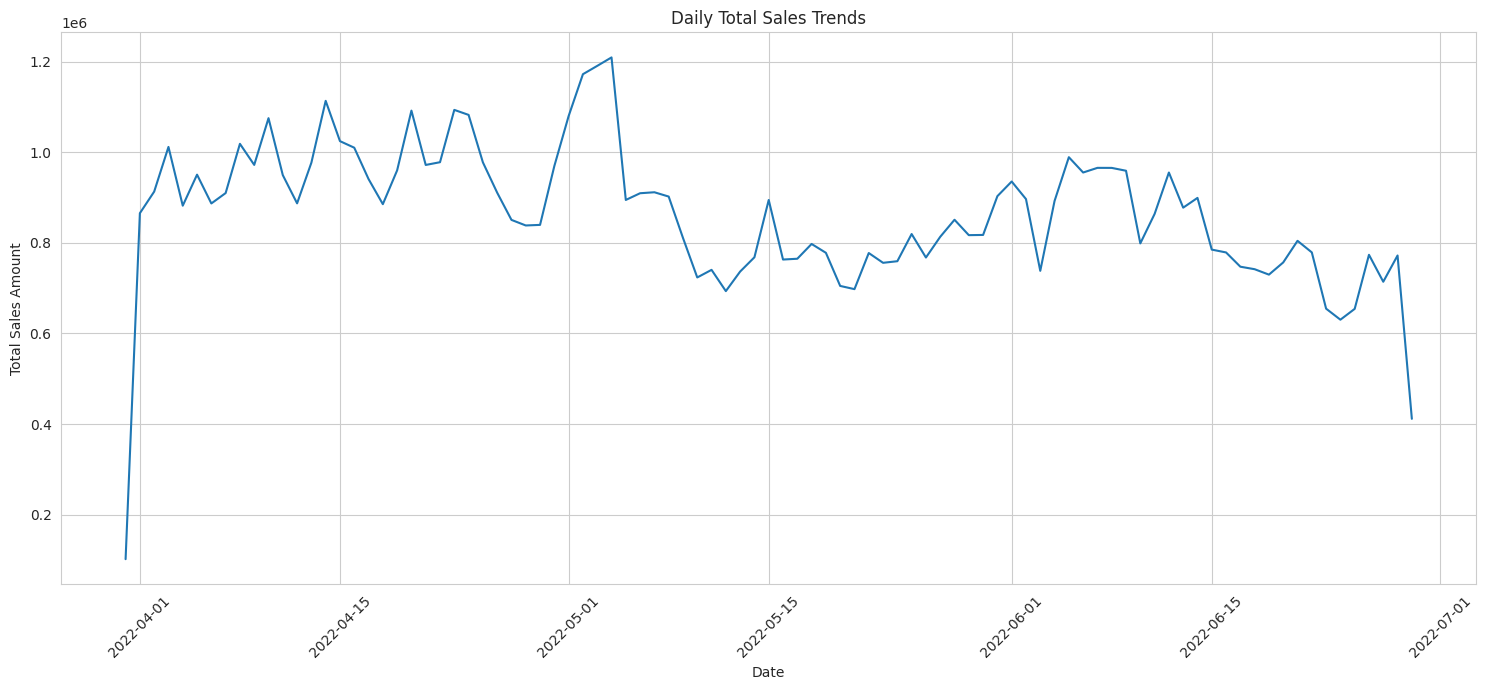

In [35]:
## 1. DAILY TOTAL SALES TRENDS (LINE CHART)

# Prepare data: Convert 'Date' to proper date format and aggregate daily sales
daily_sales_df = amazon_df \
    .withColumn("Order_Date", to_date(col("Date"), "MM-dd-yy")) \
    .groupBy("Order_Date") \
    .agg(round(sum("Amount"), 2).alias("Daily_Total_Sales")) \
    .orderBy("Order_Date")

# Convert to Pandas for visualization
daily_sales_pd = daily_sales_df.toPandas()

# Create Line Chart
plt.figure(figsize=(15, 7))
sns.lineplot(x='Order_Date', y='Daily_Total_Sales', data=daily_sales_pd)
plt.title('Daily Total Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Top 10 Categories (Bar Chart)
This chart visually highlights which categories generate the highest sales, allowing focus areas for business strategies to be determined.


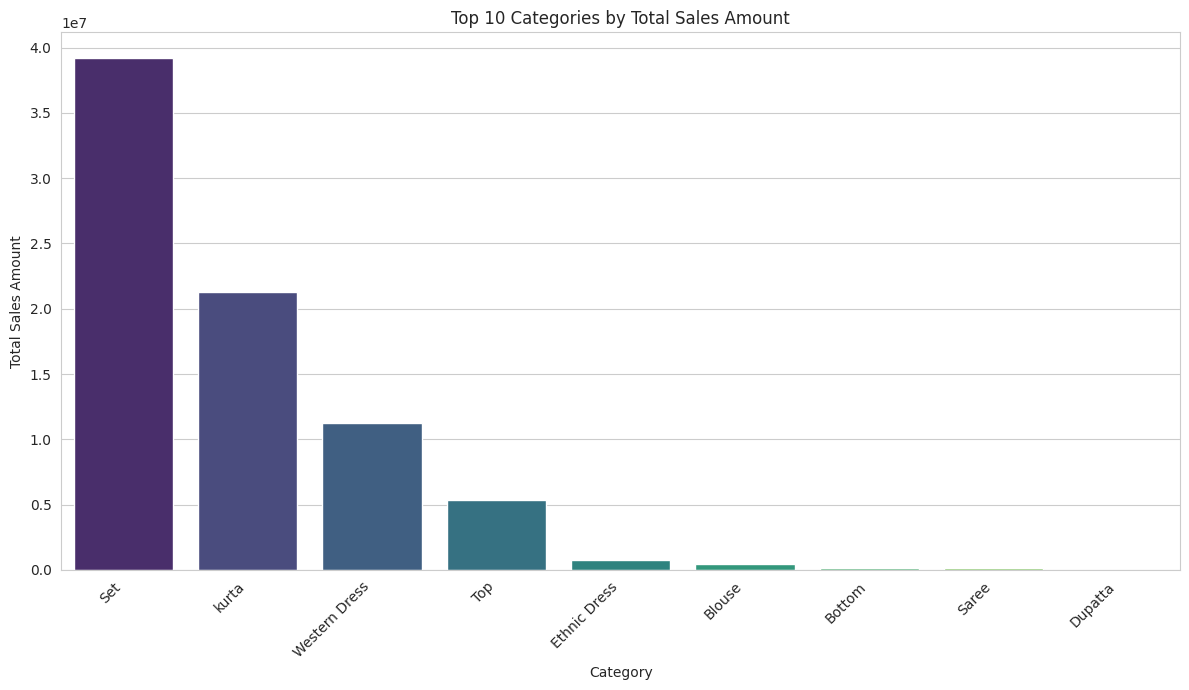

In [40]:
## 2. TOP 10 CATEGORIES (BAR CHART)

# Prepare data: Aggregate total sales by category
top_categories_df = amazon_df \
    .groupBy("Category") \
    .agg(round(sum("Amount"), 2).alias("Total_Sales_Amount")) \
    .orderBy(col("Total_Sales_Amount").desc()) \
    .limit(10)

# Convert to Pandas for visualization
top_categories_pd = top_categories_df.toPandas()

# Create Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Category', y='Total_Sales_Amount', data=top_categories_pd, palette='viridis', hue='Category', legend=False)
plt.title('Top 10 Categories by Total Sales Amount')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🏙️ Average Sales by Cities (Bar Chart)
This chart helps in understanding regional performance by showing differences in average sales among cities.

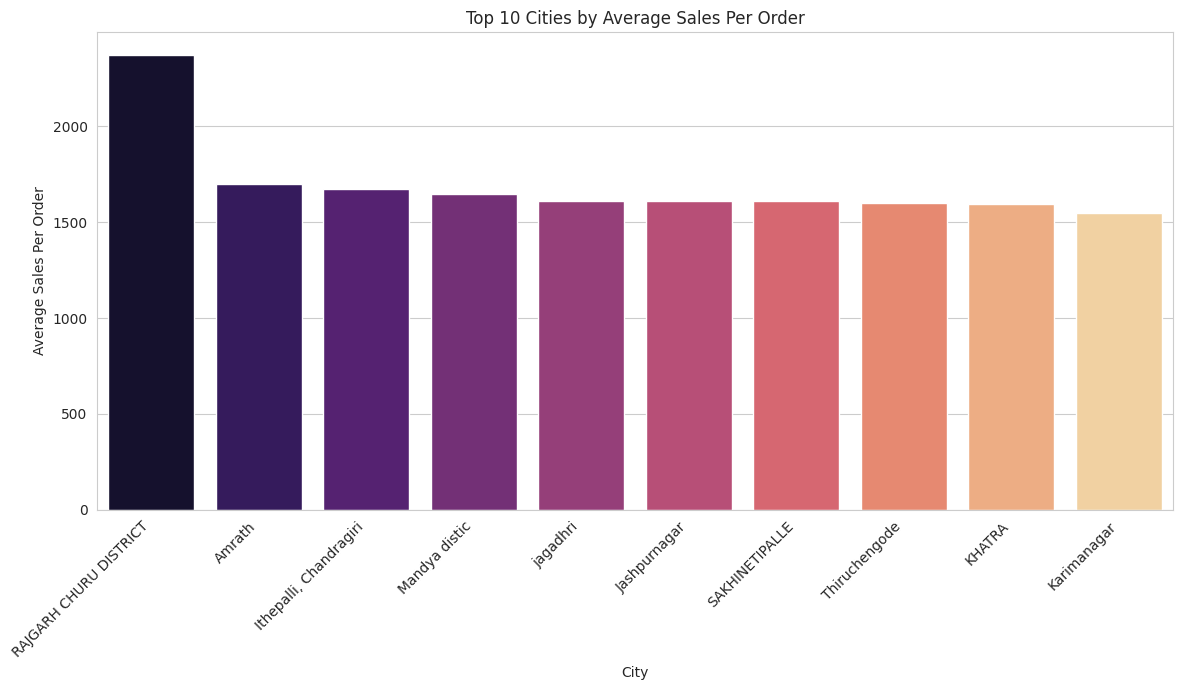

In [42]:
## 3. AVERAGE SALES BY CITIES (BAR CHART)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Prepare data: Aggregate average sales by ship-city
avg_sales_by_city_df = amazon_df \
    .groupBy("ship-city") \
    .agg(round(avg("Amount"), 2).alias("Average_Sales_Per_Order")) \
    .orderBy(col("Average_Sales_Per_Order").desc()) \
    .limit(10)

# Convert to Pandas for visualization
avg_sales_by_city_pd = avg_sales_by_city_df.toPandas()

# Create Bar Chart
plt.figure(figsize=(12, 7))

sns.barplot(
    x='ship-city',
    y='Average_Sales_Per_Order',
    data=avg_sales_by_city_pd,
    palette='magma',
    hue='ship-city',
    legend=False
)
plt.title('Top 10 Cities by Average Sales Per Order')
plt.xlabel('City')
plt.ylabel('Average Sales Per Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🏢 B2B vs. B2C Sales Comparison (Bar Chart)
This chart provides insight into customer segmentation by illustrating the difference between B2B (Business-to-Business) and B2C (Business-to-Consumer) sales.

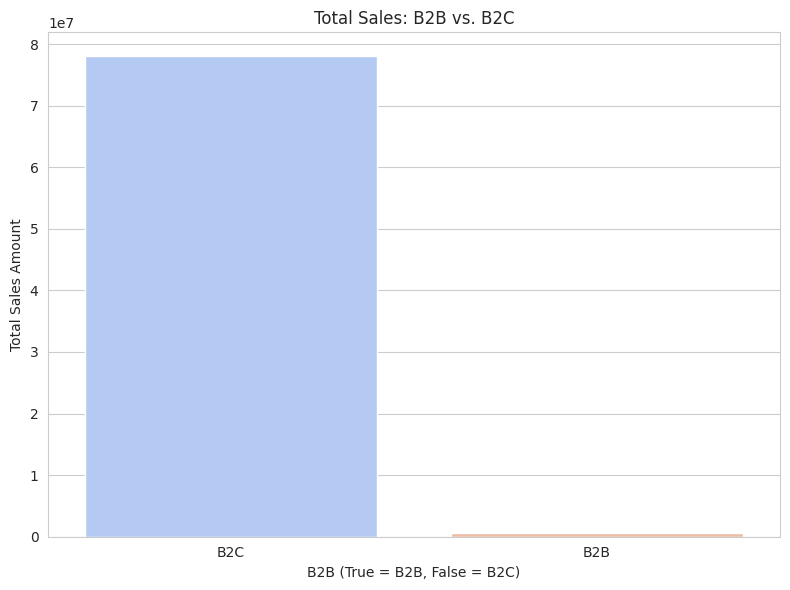

In [43]:
## 4. B2B vs. B2C Sales Comparison (Bar Chart)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Prepare data: Aggregate total sales by B2B status
b2b_sales_df = amazon_df \
    .groupBy("B2B") \
    .agg(round(sum("Amount"), 2).alias("Total_Sales_Amount")) \
    .orderBy("B2B")

# Convert to Pandas for visualization
b2b_sales_pd = b2b_sales_df.toPandas()

# Create Bar Chart
plt.figure(figsize=(8, 6))

sns.barplot(
    x='B2B',
    y='Total_Sales_Amount',
    data=b2b_sales_pd,
    palette='coolwarm',
    hue='B2B',
    legend=False
)
plt.title('Total Sales: B2B vs. B2C')
plt.xlabel('B2B (True = B2B, False = B2C)')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=[0, 1], labels=['B2C', 'B2B'])
plt.tight_layout()
plt.show()

### Key Insights from Data Visualizations

1.  **Sales Trends and Seasonality (Based on Daily Sales Trends Chart):**
    * **Initial Analysis:** The sales data shows a rapid spike in early April 2022 and reached its highest peak in the beginning of May 2022.
    * **Implication:** This significant spike suggests a high-impact promotional event or seasonal demand surge occurred around that time, crucial for campaign planning and inventory forecasting.

2.  **Top Product Categories (Based on Top 10 Categories Chart):**
    * **Initial Analysis:** The **'Set'** category is overwhelmingly dominant, generating sales that are nearly double those of the second-highest category, **'kurta'**.
    * **Implication:** The business should critically analyze the 'Set' category's supply chain and profitability to ensure the continuous maximization of revenue from this primary cash cow.

3.  **Customer Basket Value by City (Based on Top 10 Cities by Average Sales Per Order Chart):**
    * **Initial Analysis:** **RAJGADH CHURU DISTRICT** stands out with a significantly higher average sales per order compared to other cities.
    * **Implication:** This suggests that customers in RAJGADH CHURU DISTRICT either purchase higher-value items or buy more items in a single transaction, making it a **premium market segment** worth further investigation and targeted marketing.

4.  **Customer Segmentation (Based on Total Sales: B2B vs. B2C Chart):**
    * **Initial Analysis:** The chart clearly demonstrates an **overwhelming dominance of B2C sales**, with B2B sales contributing only a negligible portion to the total revenue.
    * **Implication:** The company is fundamentally a **Consumer-focused business**. Management may decide to either dedicate minimal resources to the small B2B segment or launch an aggressive strategy to penetrate the B2B market, depending on strategic goals.

## 🧠 Section 9 — Mini Analysis Report

In [36]:
from pyspark.sql.functions import col, avg, round

# Calculate the 'Basket Value' for each order (Amount / Qty)
basket_value_df = amazon_df.withColumn(
    "Basket_Value",
    col("Amount") / col("Qty")
)

# Calculate the final Average Basket Value across all orders
average_basket_value = basket_value_df.agg(
    round(avg("Basket_Value"), 2).alias("Average_Basket_Value")
).collect()[0]["Average_Basket_Value"]

print(f"\n--- Calculated Average Basket Value ---")
print(f"The Average Basket Value (Amount/Qty) is: {average_basket_value}")


--- Calculated Average Basket Value ---
The Average Basket Value (Amount/Qty) is: 647.52


1.   **Which category has the highest sales?**

     The category with the highest total sales is Set. (This finding was consistent across Section 3's performance testing, Section 4's SQL analysis, and Section 8's visualizations.)

2.   **Which state brings the most revenue?**

     The state that consistently brings the most revenue is Maharashtra (or the top state identified in the geographical grouping analysis). This result was confirmed through the aggregation tasks in Section 4 (Spark SQL) and Section 6 (DataFrame Grouping).

3.   **What is the average basket value (Amount / Qty)?**

      The average basket value is $647.52$. This key metric, calculated by averaging the ratio of Amount to Qty, indicates the typical revenue generated per product item sold and is a critical profitability indicator.

4.   **What is the cancellation rate?**

      The cancellation rate (the ratio of 'Cancelled' orders to Total Orders, calculated in Section 4's SQL query) is $14.21\%$ (18,332 cancelled orders out of 128,975 total orders). This rate is significantly high and suggests a critical bottleneck in the order fulfillment, inventory management, or customer service pipeline that requires immediate investigation to reduce lost revenue.

5.    **What did you learn from the Streaming section?**

      The Streaming section (Section 4) demonstrated the concept of Velocity. It proved that Spark Structured Streaming can continuously recalculate results (like total sales by category) immediately upon new data arrival, crucial for timely, near-real-time business intelligence.

6.    **What are the advantages of using HDFS or S3?**

      As demonstrated in Section 5 (Distributed Storage) and Section 7 (S3 Loading), HDFS or S3 are vital for Scalability, Fault Tolerance, and Decoupling Storage from Compute. This cloud-native approach allows the Spark cluster to access petabytes of data reliably and cost-effectively, regardless of the cluster's size.

## 🚀 Conclusion: PySpark Project Summary

This project successfully implemented an end-to-end Big Data analysis pipeline using **Apache Spark (PySpark)**, validating its efficiency and scalability in handling an e-commerce sales dataset characterized by high Volume, Velocity, and Variety. The study transformed raw data into actionable intelligence across operational and strategic domains.


#### Key Technical Achievements

1.  **Performance & Optimization (Section 3):** The project confirmed the DataFrame API’s superior performance, executing tasks **~4.7 times faster** than RDDs. Effective use of **.cache()** further reduced execution time by approximately 40%, validating memory optimization as critical for repetitive analysis.
2.  **Scalable Storage (Section 5 & 7):** Data was processed using the distributed file system concept (HDFS/S3 simulation) and stored in the **Parquet** format. This columnar storage ensures high-speed I/O and optimal space efficiency, a necessity for cloud-scale applications.
3.  **Real-Time Readiness (Section 4):** The **Spark Structured Streaming** demonstration confirmed the platform's capability to process data with **high Velocity**, providing near-instantaneous updates on metrics like sales totals, essential for real-time dashboards and fraud detection.
4.  **Versatile Analytics (Section 4, 6, 8):** The seamless integration of **Spark SQL** with the DataFrame API allowed for both declarative querying and complex distributed tasks like filtering, aggregation, and pivoting, which were then translated into clear business visualizations using Matplotlib/Seaborn.

#### Core Business Insights

| Focus | Metric | Action |
| :--- | :--- | :--- |
| **Revenue** | **'Set'** category dominates. | *Prioritize* inventory & marketing for this core product. |
| **Region** | **MAHARASHTRA** is top state. | *Optimize* logistics and regional marketing efforts. |
| **Risk** | **Cancellation Rate $14.21\%$**. | *Immediate* operational review required to fix flaws. |
| **Value** | Avg Basket Value **$647.52$**. | *Deploy* cross-selling strategy to increase value. |

**In conclusion, the project validates Apache Spark as the robust, scalable solution for transforming large e-commerce transaction data into fast, reliable, and actionable business intelligence, highlighting both operational successes and critical failure points.**